In [0]:
# Importing Spark sesison
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
import numpy as np # Numerical Python library
import pandas as pd # Dataframe Library
import matplotlib.pyplot as plt #Plotting library
import seaborn as sns 
sns.set_theme(style='darkgrid',palette='hls')
import string

In [0]:
## Using sqlContext to query all the data from the table and load it into a spark datafrme
data = sqlContext.sql("Select * from default.ecommerce_customers_5_csv")
## Using toPandas to convert the spark dataframe into a pandas dataframe to perform operations
df = data.toPandas()

In [0]:
## Exploratory Data Analysis
## Data Wrangling/Addressing Missing Values

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [0]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Out[105]: Text(0.5, 1.0, 'Missing values will be highlighted by yellow underlines')

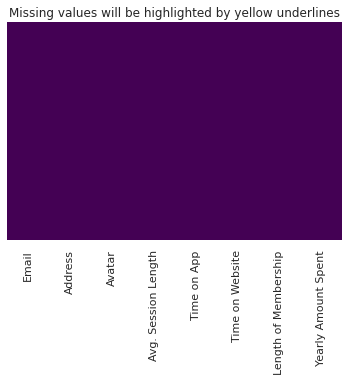

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing values will be highlighted by yellow underlines')

Out[106]: Text(0.5, 1.0, 'Correlation Coefficient')

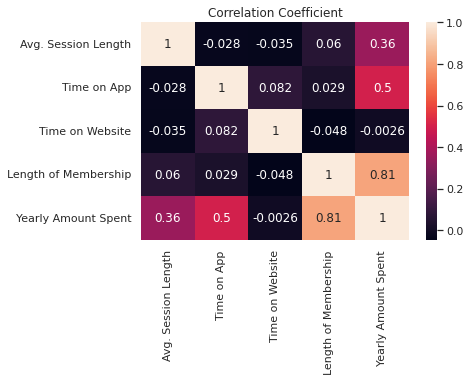

In [0]:
## Checking Correlation and Coefficient values for all independent variables
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Coefficient')

In [0]:
## We can see that Length of Membership, Time on App and Avg. Session Length have strong positive correlations with Yearly Amount Spent

In [0]:
df.columns

Out[83]: Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

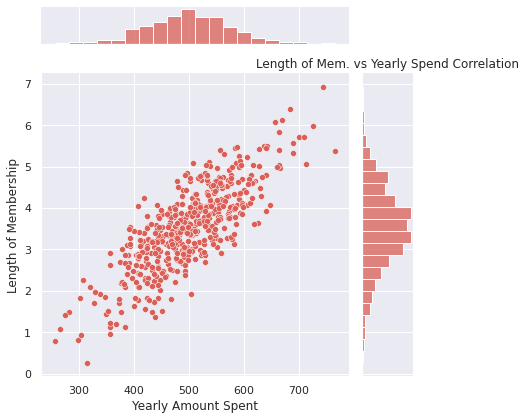

In [0]:
sns.jointplot(x='Yearly Amount Spent',y='Length of Membership',data=df)
plt.title('Length of Mem. vs Yearly Spend Correlation')
plt.tight_layout()

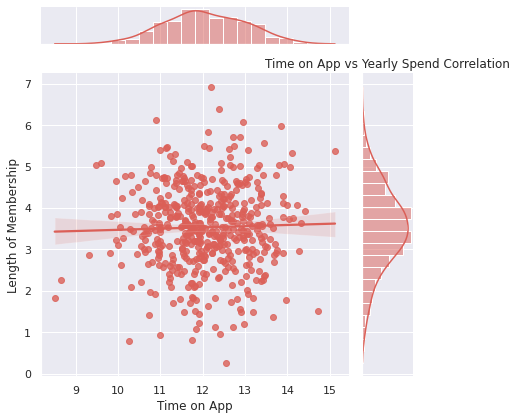

In [0]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='reg')
plt.title('Time on App vs Yearly Spend Correlation')
plt.tight_layout()

In [0]:
## Feature Consolidation / Engineering

In [0]:
## Extracting Domain from the Email address to use it as an Feature
email_temp = df['Email'].apply(lambda x: x.split('@')[1])
email_temp = pd.DataFrame(email_temp)
email_temp = email_temp['Email'].apply(lambda x: x.split('.')[0])
email_temp = pd.DataFrame(email_temp)
df['Email'] = email_temp

In [0]:
## Lets drop the categorical columns
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [0]:
df.head(5)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [0]:
## Lets Standardize this data and feed it into Linear Regression algorithm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [0]:
X = df.drop('Yearly Amount Spent',axis=1)
y = df['Yearly Amount Spent']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
pipe = Pipeline([
  ('scaler',StandardScaler()),
  ('lin_reg',LinearRegression()),
])

In [0]:
pipe.fit(X_train,y_train)

Out[129]: Pipeline(steps=[('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [0]:
predict_lr = pipe.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
print('MAE Score:',metrics.mean_absolute_error(y_test,predict_lr))
print('MSE Score:',metrics.mean_squared_error(y_test,predict_lr))
print('RMSE Score:',metrics.r2_score(y_test,predict_lr))

MAE Score: 7.323320751171463
MSE Score: 82.9058914423778
RMSE Score: 0.9874831798263499


In [0]:
## Thank You